In [1]:
from pettingzoo.mpe import simple_spread_v3
import pandas as pd
import numpy as np

env = simple_spread_v3.env(render_mode="human")
env.reset()

In [2]:
from Wrapper.simple_spread import raw_env
from tabulate import tabulate
import pandas as pd
import numpy as np

env = simple_spread_v3.parallel_env(render_mode="human")
env. reset()
observations = env.reset()
num_steps = 30
data = []

for _ in range(num_steps):
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    next_observations, rewards, terminations, truncations, infos = env.step(actions)

    for agent in env.agents:
        data.append({
            "agent": agent,
            "x_position": next_observations[agent][0],
            "y_position": next_observations[agent][1],
            "x_velocity": next_observations[agent][2],
            "y_velocity": next_observations[agent][3],
            "action": actions[agent],
            "reward": rewards[agent],
            "infos": infos[agent],

        })
    observations = next_observations
    if all(terminations.values()) or all(truncations.values()):
        break
env.close()

data = pd.DataFrame(data)
print(tabulate(data, headers='keys', tablefmt='psql'))




+----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------+
|    | agent   |   x_position |   y_position |   x_velocity |   y_velocity |   action |    reward | infos   |
|----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------|
|  0 | agent_0 | -1.98501e-40 |  2.31031e-40 |     0.450192 |     0.672227 |        0 | -0.520326 | {}      |
|  1 | agent_1 | -0           | -0.5         |    -0.146709 |     0.812707 |        3 | -0.520326 | {}      |
|  2 | agent_2 |  1.98501e-40 | -0.5         |     0.701995 |     0.37916  |        3 | -0.520326 | {}      |
|  3 | agent_0 | -3.47378e-40 | -0.5         |     0.450192 |     0.672227 |        3 | -0.496427 | {}      |
|  4 | agent_1 | -0           |  0.125       |    -0.146709 |     0.762707 |        4 | -0.496427 | {}      |
|  5 | agent_2 |  3.47378e-40 |  0.125       |     0.701995 |     0.32916  |        4 | -0.496427 | {}      |
|  6 | age

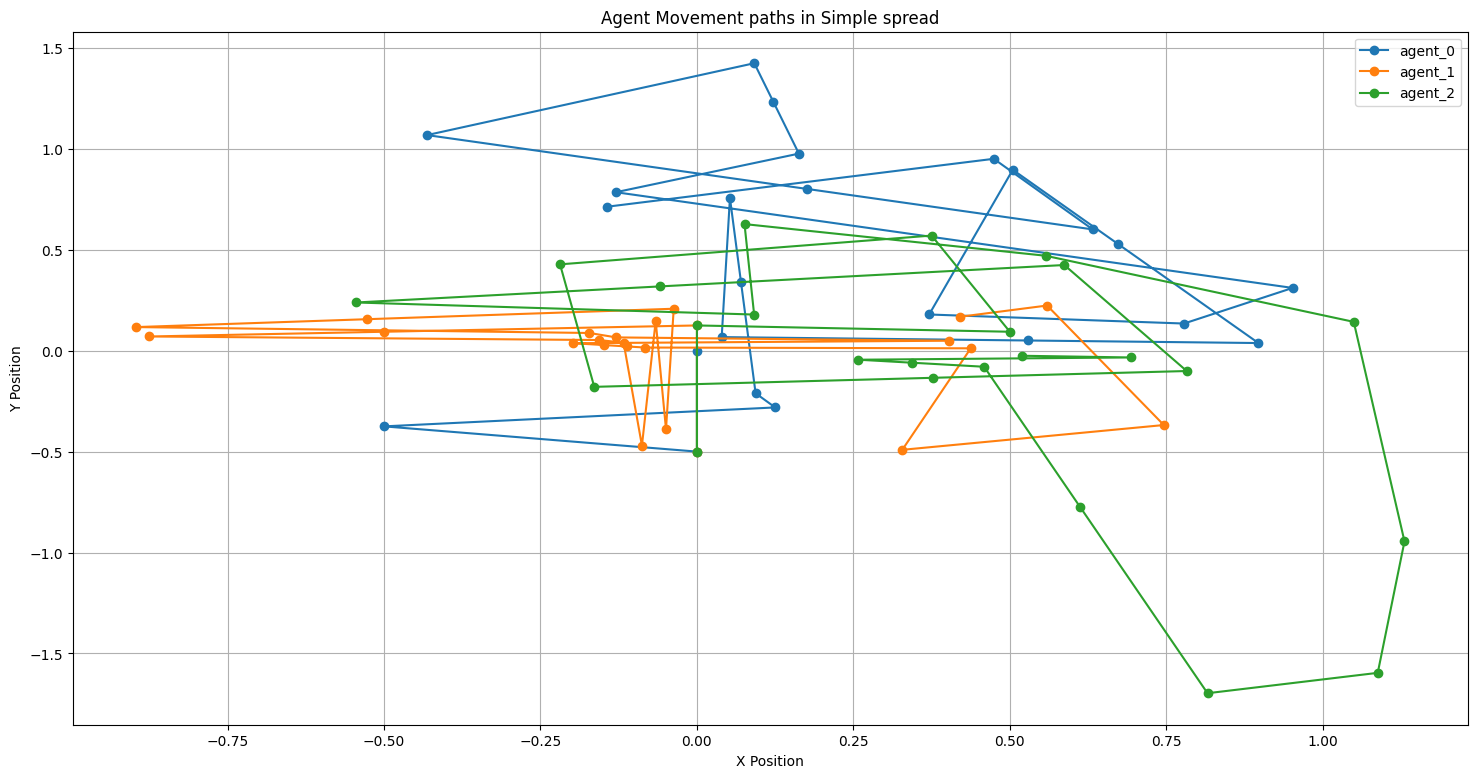

In [3]:
import matplotlib.pyplot as plt

agents = data["agent"].unique()

plt.figure(figsize=(18,9))
for agent in agents:
    agent_data = data[data["agent"] == agent]
    plt.plot(agent_data["x_position"], agent_data["y_position"],marker='o', linestyle='-', label=agent)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Agent Movement paths in Simple spread')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from pettingzoo.mpe import simple_spread_v3
env = simple_spread_v3.env(render_mode="human")
env.reset()
from tabulate import tabulate
import pandas as pd
import numpy as np

env = simple_spread_v3.parallel_env(render_mode="human")
env. reset()


agents = env.agents[:1]
observations = env.reset()
num_steps = 100
data2 = []

for _ in range(num_steps):
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    next_observations, rewards, terminations, truncations, infos = env.step(actions)

    for agent in env.agents:
        data2.append({
            "agent": agent,
            "x_position": next_observations[agent][0],
            "y_position": next_observations[agent][1],
            "x_velocity": next_observations[agent][2],
            "y_velocity": next_observations[agent][3],
            "action": actions[agent],
            "reward": rewards[agent],
            "infos": infos[agent],

        })
    observations = next_observations
    if all(terminations.values()) or all(truncations.values()):
        break
env.close()

data2 = pd.DataFrame(data2)
print(tabulate(data2, headers='keys', tablefmt='psql'))


+----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------+
|    | agent   |   x_position |   y_position |   x_velocity |   y_velocity |   action |    reward | infos   |
|----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------|
|  0 | agent_0 |   -0.0149293 |  -0.366172   |    0.954291  |   0.566724   |        3 | -1.17939  | {}      |
|  1 | agent_1 |    0.0149293 |  -0.633828   |    0.986059  |   0.281956   |        3 | -1.17939  | {}      |
|  2 | agent_2 |    0.5       |   0          |    0.137614  |   0.659843   |        2 | -0.679391 | {}      |
|  3 | agent_0 |   -0.0261263 |  -0.140801   |    0.952798  |   0.530107   |        0 | -0.729404 | {}      |
|  4 | agent_1 |    0.0261263 |  -1.1092     |    0.987552  |   0.218573   |        3 | -0.729404 | {}      |
|  5 | agent_2 |   -0.125     |   0          |    0.187614  |   0.659843   |        1 | -0.729404 | {}      |
|  6 | age

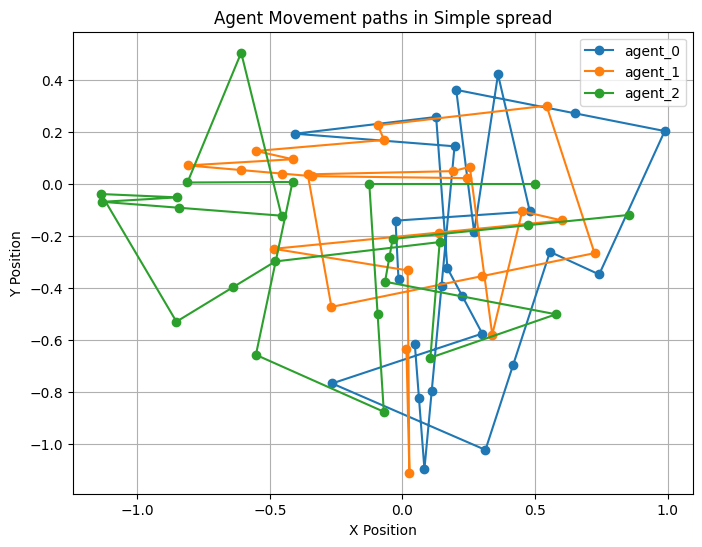

In [5]:
import matplotlib.pyplot as plt

agents = data2["agent"].unique()

plt.figure(figsize=(8,6))
for agent in agents:
    agent_data2 = data2[data2["agent"] == agent]
    plt.plot(agent_data2["x_position"], agent_data2["y_position"],marker='o', linestyle='-', label=agent)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Agent Movement paths in Simple spread')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from pettingzoo.utils import BaseWrapper
import numpy as np


class LimitedObservabilityWrapper(BaseWrapper): # Inherits from pettingzoo's wrapper
    def __init__(self, env, hide_agents=False, hide_landmarks=False):
        super().__init__(env) # Initialize Environment
        self.hide_agents = hide_agents # Boolean to control agents visibility
        self.hide_landmarks = hide_landmarks # Boolean to control landmark visibility

    # Overiding reset method
    def reset(self, seed=None, options=None):
        observations, _ = self.env.reset(seed=seed, options=options) # call original reset
        return self.modify_observations(observations)

    # Overiding Step method
    def step(self, actions):
        observations, rewards, terminations, truncations, infos = self.env.step(actions) #Execute step
        return self.modify_observations(observations), rewards, terminations, truncations, infos

    # Modifying Observations dynamically
    def modify_observations(self, observations):
        modified_obs = {} # Create dictionary for modified observations
        for agent, agent_obs in observations.items(): # Loop through each agent's observation
            obs_array = np.array(agent_obs) # Convert to numpy array

            if self.hide_agents:
                obs_array[-8:] = 0  # Zero out the last 8 values i.e other agent's position

            if self.hide_landmarks:
                obs_array[4:10] = 0 # Zero out 6 landmark positions

            modified_obs[agent] = obs_array # Store modified observation
        return modified_obs






In [15]:
from pettingzoo.mpe import simple_spread_v3  # Import the environment
from tabulate import tabulate
import pandas as pd
import numpy as np

env = simple_spread_v3.parallel_env()  # Initialize the parallel environment
wrapped_env = LimitedObservabilityWrapper(env, hide_agents=True, hide_landmarks=False)  # Apply wrapper

observations = wrapped_env.reset()  # Start the environment with modified observations

# Feature names
feature_names = [
    "SP_x", "SP_y", # Agents self position
    "SV_x", "SV_y", # Agents velocity
    "L1_x", "L1_y" # Landmark
]


max_steps = 25
all_steps = []

# Take a single step
for step in range(max_steps):
    obs_before = {agent: list(map(lambda value: round(float(value), 5), observations[agent][:6]))
              for agent in wrapped_env.agents} # Print only first 6 values


    actions = {agent: wrapped_env.action_space(agent).sample() for agent in wrapped_env.agents}
    new_obs, rewards, terminations, truncations, infos = wrapped_env.step(actions)

    new_obs = {agent: list(map(lambda value: round(float(value), 5), new_obs[agent][:6])) for agent in wrapped_env.agents}

# Store data for this step
    step_data = (
        [["Step " + str(step + 1), "Feature Names"] + feature_names] +  # Step label & Feature names
        [[agent, "Before"] + obs_before[agent] for agent in wrapped_env.agents] +  # Before observations
        [[agent, "After"] + new_obs[agent] for agent in wrapped_env.agents]  # After observations
    )

    all_steps.extend(step_data)  # Add to overall data

     # Stop if all agents are done
    if all(terminations.values()) or all(truncations.values()):
        print(f"✅ Simulation ended at Step {step+1} (Environment Terminated)")
        break  # Exit loop if simulation stops


# Convert to DataFrame
df_obs = pd.DataFrame(
    all_steps,
    columns=["Step", "Agent"] + feature_names  # Align columns properly
)



print(tabulate(df_obs, headers='keys', tablefmt='psql'))

df_obs.to_csv("df_obs.csv", index=False)


✅ Simulation ended at Step 25 (Environment Terminated)
+-----+---------+---------------+----------+----------+----------+----------+----------+----------+
|     | Step    | Agent         | SP_x     | SP_y     | SV_x     | SV_y     | L1_x     | L1_y     |
|-----+---------+---------------+----------+----------+----------+----------+----------+----------|
|   0 | Step 1  | Feature Names | SP_x     | SP_y     | SV_x     | SV_y     | L1_x     | L1_y     |
|   1 | agent_0 | Before        | 0.0      | 0.0      | 0.95908  | -0.18545 | -0.28234 | 0.21327  |
|   2 | agent_1 | Before        | 0.0      | 0.0      | -0.86488 | 0.59421  | 1.54163  | -0.56639 |
|   3 | agent_2 | Before        | 0.0      | 0.0      | -0.8597  | 0.72548  | 1.53644  | -0.69765 |
|   4 | agent_0 | After         | 0.5      | 0.0      | 0.95908  | -0.18545 | -0.28234 | 0.21327  |
|   5 | agent_1 | After         | -0.56655 | -1.685   | -0.86488 | 0.59421  | 1.54163  | -0.56639 |
|   6 | agent_2 | After         | -0.43345 | 

In [17]:
df_obs_load = pd.read_csv("df_obs.csv")
df = df_obs_load.head()

/home/oluwadamilare-adegun/PycharmProjects/Bachelor_Thesis/venv/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



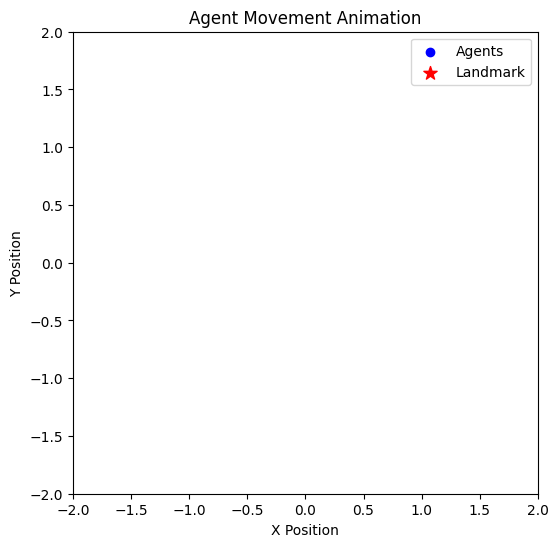

In [18]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Filter only "After" movement states to track actual motion
df_filtered = df[df["Agent"] != "Feature Names"]
df_filtered = df_filtered[df_filtered["Agent"] != "Before"]

# Convert necessary columns to float
df_filtered[["SP_x", "SP_y", "L1_x", "L1_y"]] = df_filtered[["SP_x", "SP_y", "L1_x", "L1_y"]].astype(float)

# Get unique agents
agents = df_filtered["Agent"].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)  # Adjust based on observed movement range
ax.set_ylim(-2, 2)
ax.set_title("Agent Movement Animation")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

# Initialize scatter plots
agent_scatter = ax.scatter([], [], c='blue', label="Agents")
landmark_scatter = ax.scatter([], [], c='red', marker="*", s=100, label="Landmark")

# Annotation for step counter
step_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Animation function
def update(frame):
    step_data = df_filtered[df_filtered["Step"] == f"Step {frame+1}"]

    if step_data.empty:
        return agent_scatter, landmark_scatter, step_text

    # Extract agent and landmark positions
    agent_positions = np.array(step_data[["SP_x", "SP_y"]])
    landmark_positions = np.array(step_data[["L1_x", "L1_y"]].iloc[0])  # Only one landmark

    # Update scatter plot data
    agent_scatter.set_offsets(agent_positions)
    landmark_scatter.set_offsets([landmark_positions])

    # Update step text
    step_text.set_text(f"Step: {frame+1}")

    return agent_scatter, landmark_scatter, step_text

# Number of frames (assuming each step is numbered sequentially)
num_frames = df_filtered["Step"].nunique()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=500, repeat=True)

# Display animation
plt.legend()
plt.show()
